In [1]:
from MultiFactorModelTest import MultiFactorModelTest
from scipy import io
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import h5py

ROOT = "../PHBS_multi-factor_project/002 src/08 multiFactorModelPython"

In [2]:
sytleFactorDir = ROOT + "/bigDataProjectData/02 styleFactor/02 styleFactor/styleFactor_20200111.mat"
industryFactorDir = ROOT + "/bigDataProjectData/02 styleFactor/01 industryFactor/industryFactor_20200111.mat"
alphaFactorDir = ROOT + "/bigDataProjectData/04 factorNormalization/NonOrth_orthFactor_20200111.mat"
closeDir = ROOT + "/bigDataProjectData/closeStock.mat"
stockScreenDir = ROOT + "/bigDataProjectData/stockScreen_20200109.mat"

In [3]:
alphaFactorMat = h5py.File(alphaFactorDir, 'r')
print(alphaFactorMat.keys())
alphaFactorCube = np.transpose(alphaFactorMat['orthFactorCube'])
print('alphaFactorCube:', alphaFactorCube.shape)

<KeysViewHDF5 ['#refs#', 'alphaNameList', 'orthFactorCube']>
alphaFactorCube: (2166, 3842, 2)


In [4]:
sytleFactorMat = h5py.File(sytleFactorDir, 'r')
print(sytleFactorMat.keys())
sytleFactorCube = np.transpose(sytleFactorMat['exposure'])
print('sytleFactorCube:', sytleFactorCube.shape)

<KeysViewHDF5 ['#refs#', 'alphaNameList', 'exposure']>
sytleFactorCube: (2166, 3842, 8)


In [5]:
industryFactorMat = h5py.File(industryFactorDir, 'r')
print(industryFactorMat.keys())
industryFactorCube = np.transpose(industryFactorMat['exposure'])
print('industryFactorCube:', industryFactorCube.shape)

<KeysViewHDF5 ['exposure', 'industryFactor']>
industryFactorCube: (2166, 3842, 34)


In [6]:
closeMat = io.loadmat(closeDir)
print(closeMat.keys())
close = closeMat['close']
print('close:', close.shape)

dict_keys(['__header__', '__version__', '__globals__', 'close'])
close: (2166, 3842)


In [7]:
stockScreenMat = io.loadmat(stockScreenDir)
print(stockScreenMat.keys())
stockScreenTable = stockScreenMat['stockScreenMatrix']
print('stockScreenTable:', stockScreenTable.shape)

dict_keys(['__header__', '__version__', '__globals__', 'stockScreenMatrix'])
stockScreenTable: (2166, 3842)


In [9]:
Klass = MultiFactorModelTest(close, 
                             industryFactorCube, 
                             sytleFactorCube, 
                             alphaFactorCube, 
                             stockScreenTable, 
                             d_timeShift = 1 )
Klass


modelIC mean of alpha index  0 : 0.03241831787207756


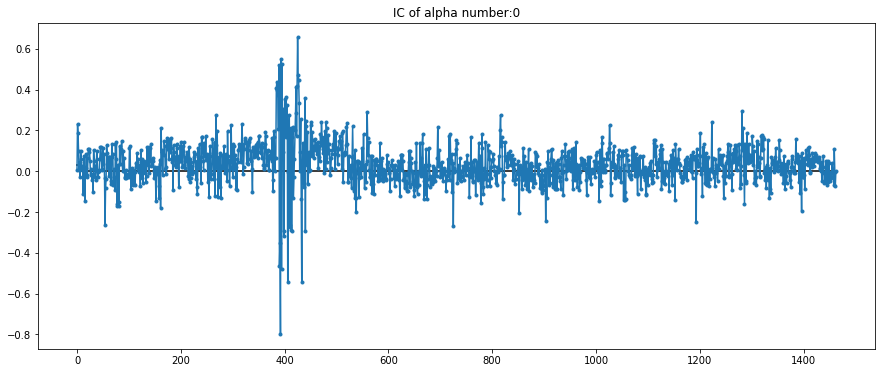

In [10]:
modelIC, predictReturnTable, factorReturnTable, validFactorTable = Klass.singleFactorTest(0, noStyle=True,doPlot=True, backTestDays =1465, T = 1)



modelIC mean of alpha model  : 0.038978797534281


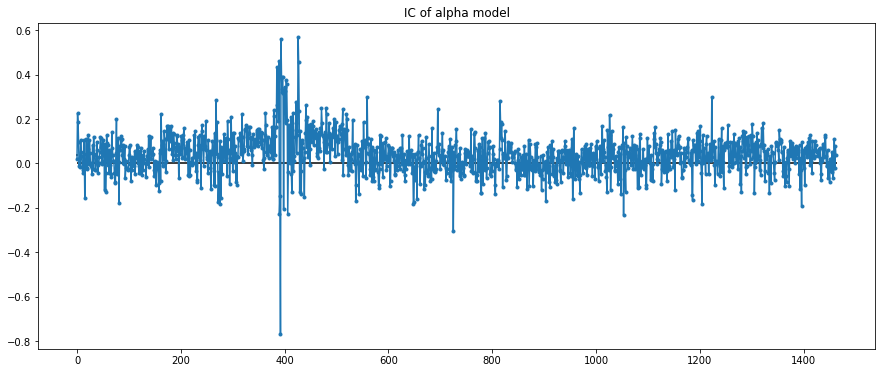

In [11]:
modelIC, predictReturnTable, factorReturnTable, validFactorTable = Klass.multiFactorTest(noStyle=True,doPlot=True, backTestDays =1465, T = 1)
